In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv(r'./Global_Cybersecurity_Threats_2015-2024.csv')

In [5]:
df.head(5)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


# Countries present in the dataset

In [11]:
countries = df['Country'].drop_duplicates()

In [12]:
countries

0         China
2         India
3            UK
4       Germany
7        France
15    Australia
16       Russia
20       Brazil
23        Japan
38          USA
Name: Country, dtype: object

In [62]:
total_loss = round(df.groupby('Country')['Financial Loss (in Million $)'].sum())

In [63]:
total_loss

Country
Australia    15403.0
Brazil       15783.0
China        13714.0
France       14972.0
Germany      15793.0
India        14566.0
Japan        15197.0
Russia       14735.0
UK           16503.0
USA          14812.0
Name: Financial Loss (in Million $), dtype: float64

# This is the total loss companies faced due to cyberattacks between 2015-2024

[]

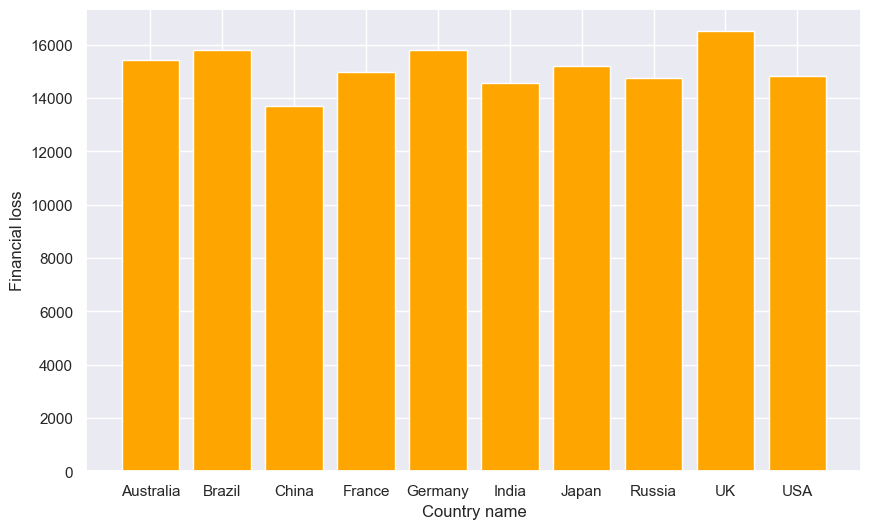

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(total_loss.index, total_loss.values, color='orange')
plt.xlabel('Country name')
plt.ylabel('Financial loss')
plt.plot()

In [60]:
total_affected_user = round(df.groupby('Country')['Number of Affected Users'].mean())

# Visualization based on average affected users

In [69]:
total_affected_user

Country
Australia    505090.0
Brazil       544539.0
China        496729.0
France       512227.0
Germany      507475.0
India        484346.0
Japan        487580.0
Russia       515905.0
UK           490545.0
USA          502442.0
Name: Number of Affected Users, dtype: float64

[]

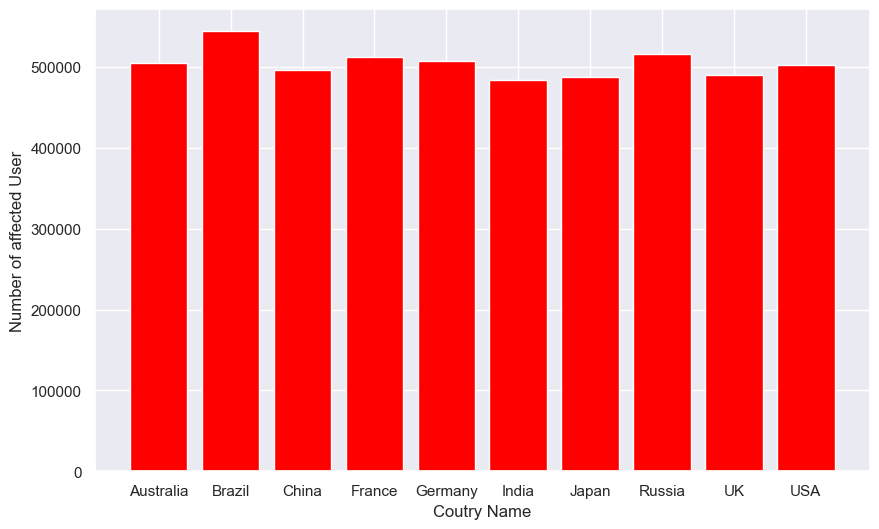

In [51]:
plt.figure(figsize=(10,6))
plt.bar(total_affected_user.index, total_affected_user.values, color='red')
plt.xlabel('Coutry Name')
plt.ylabel('Number of affected User')
plt.plot()

In [66]:
max_loss=total_loss.idxmax()

In [67]:
max_afffected_users=total_affected_user.idxmax()

In [73]:
print(f"Country which suffered max loss is : {max_loss} with total loss of: ${total_loss.max()} million\nCountry with the most affected users: {max_afffected_users} with average number of users be: {total_affected_user.max()}")

Country which suffered max loss is : UK with total loss of: $16503.0 million
Country with the most affected users: Brazil with average number of users be: 544539.0


# Analyze which attacks are most performed attacks in these countries so that mitigation actions can be taken efficiently

In [74]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [76]:
df['Attack Type'].drop_duplicates()

0              Phishing
1            Ransomware
2     Man-in-the-Middle
6                  DDoS
7         SQL Injection
18              Malware
Name: Attack Type, dtype: object

### UK

In [80]:
attacks_uk = df[df['Country']=='UK']['Attack Type'].value_counts()

# Attacks Visualized in UK b/w 2015-2024

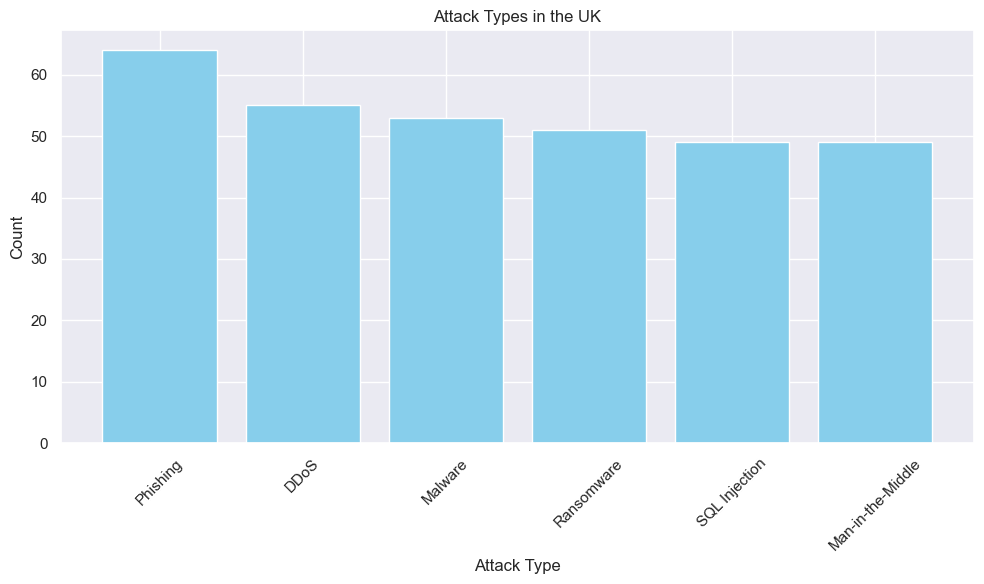

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(attacks_uk.index, attacks_uk.values, color='skyblue')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Attack Types in the UK')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# from the chart above we can clearly see Phishing is the most frequent used attack

---
# Defence mechanism used by UK to ward off the phishing attacks
---

In [99]:
mechanism_def = df[(df['Country']=='UK') & (df['Attack Type']=='Phishing')]['Defense Mechanism Used'].value_counts()

[]

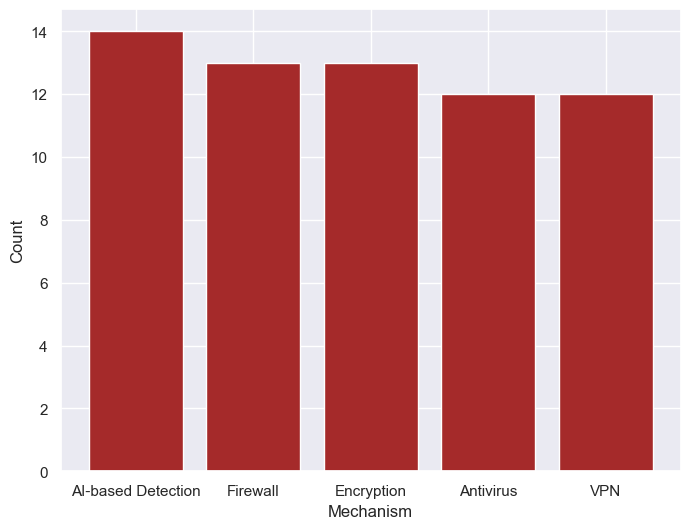

In [109]:
plt.figure(figsize=(8,6))
plt.bar(mechanism_def.index, mechanism_def.values, color='brown')
plt.xlabel('Mechanism')
plt.ylabel('Count')
plt.plot()

# We can see AI-based Detection is mostly used against Phishing attacks
---
# Now let's look after the attack source for these phishing attacks

In [215]:
source_attack = df[(df['Country']=='UK') & (df['Attack Type']=='Phishing')]['Attack Source'].value_counts()

[]

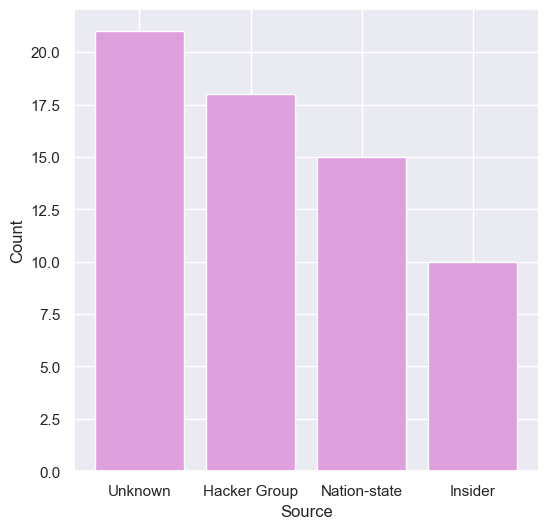

In [216]:
plt.figure(figsize=(6,6))
plt.bar(source_attack.index, source_attack.values, color='plum')
plt.xlabel('Source')
plt.ylabel('Count')
plt.plot()

# We can see first one is "Unknown" attackers group
---

# Now let's find the average hours that these defensive measures took to fend off these attacks against the attacks

[]

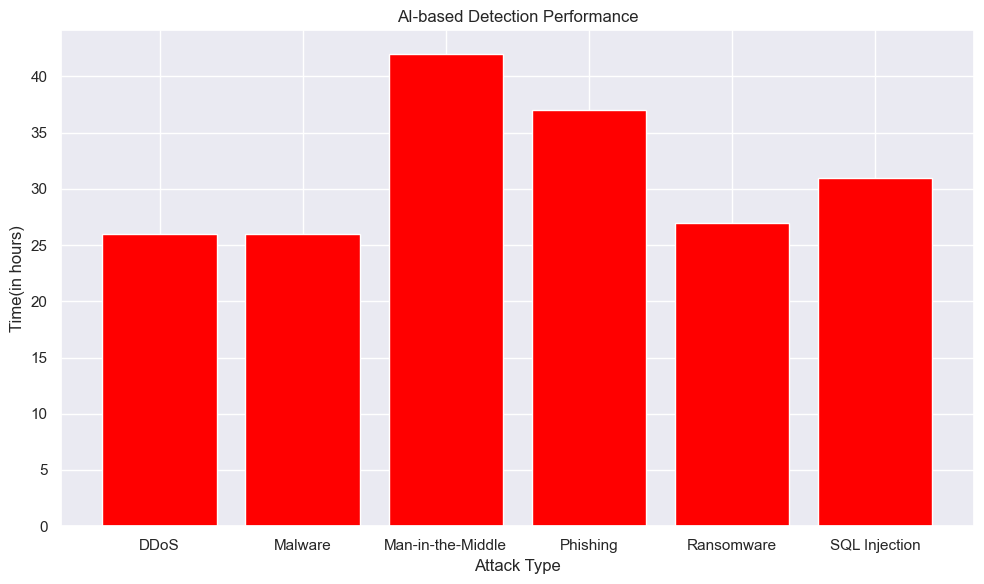

In [217]:
avg_time_attack_type = round(df[(df['Country']=='UK') & (df['Defense Mechanism Used']=='AI-based Detection')].groupby('Attack Type')['Incident Resolution Time (in Hours)'].mean())
plt.figure(figsize=(10,6))
plt.bar(avg_time_attack_type.index, avg_time_attack_type.values, color='red')
plt.xlabel('Attack Type')
plt.ylabel('Time(in hours)')
plt.title('AI-based Detection Performance')
plt.tight_layout()
plt.plot()

# Against which attackers it took too long to defend against

In [252]:
avg_time_attack_source = round(df[(df['Country']=='UK') & (df['Attack Type']=='Phishing')].groupby('Attack Source')['Incident Resolution Time (in Hours)'].mean().drop('Unknown')) 

[]

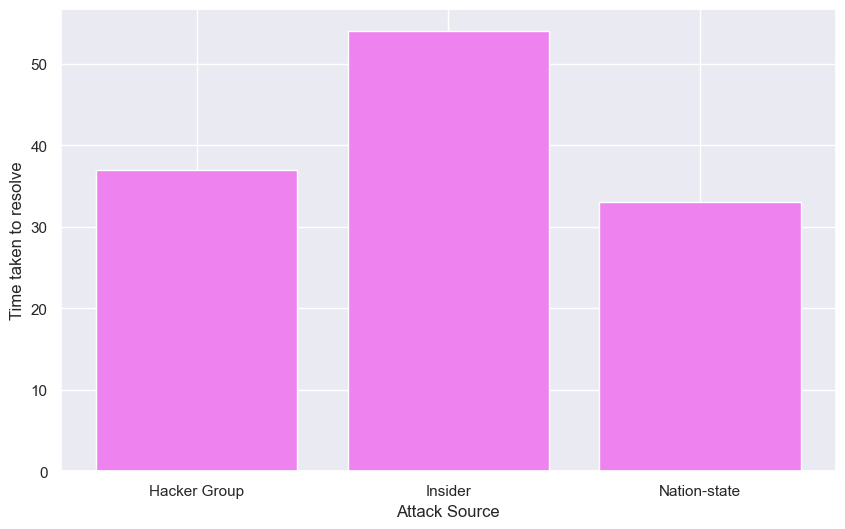

In [253]:
plt.figure(figsize=(10,6))
plt.bar(avg_time_attack_source.index, avg_time_attack_source.values, color='violet')
plt.xlabel("Attack Source")
plt.ylabel("Time taken to resolve")
plt.plot()

# Insider attacks took most of the time to be defended against
---

# ***Which attacks insiders used?***

In [254]:
insider_attack = df[(df['Country']=='UK') & (df['Attack Source']=='Insider')]['Attack Type'].value_counts()

[]

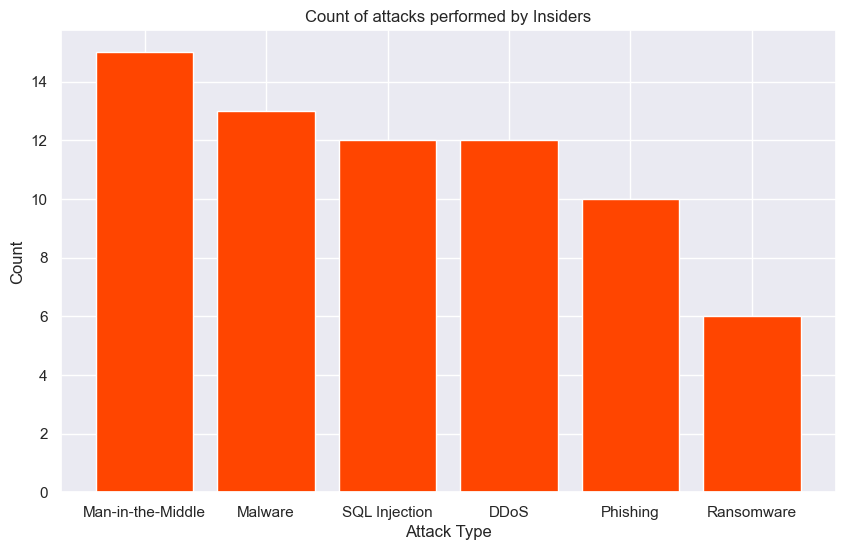

In [255]:
plt.figure(figsize=(10,6))
plt.bar(insider_attack.index, insider_attack.values, color='orangered')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Count of attacks performed by Insiders')
plt.plot()

# Most affected sector 

In [224]:
most_affected_sector = df[(df['Country']=='UK') & (df['Attack Type']=='Phishing')]['Target Industry'].value_counts()

[]

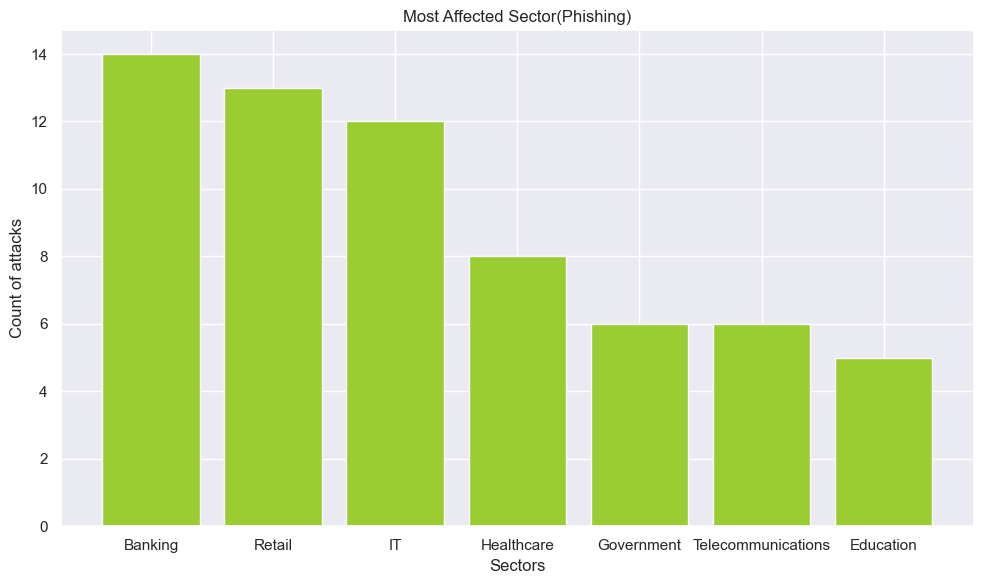

In [225]:
plt.figure(figsize=(10,6))
plt.bar(most_affected_sector.index, most_affected_sector.values, color='yellowgreen')
plt.xlabel('Sectors')
plt.ylabel('Count of attacks')
plt.title('Most Affected Sector(Phishing)')
plt.tight_layout()
plt.plot()

[]

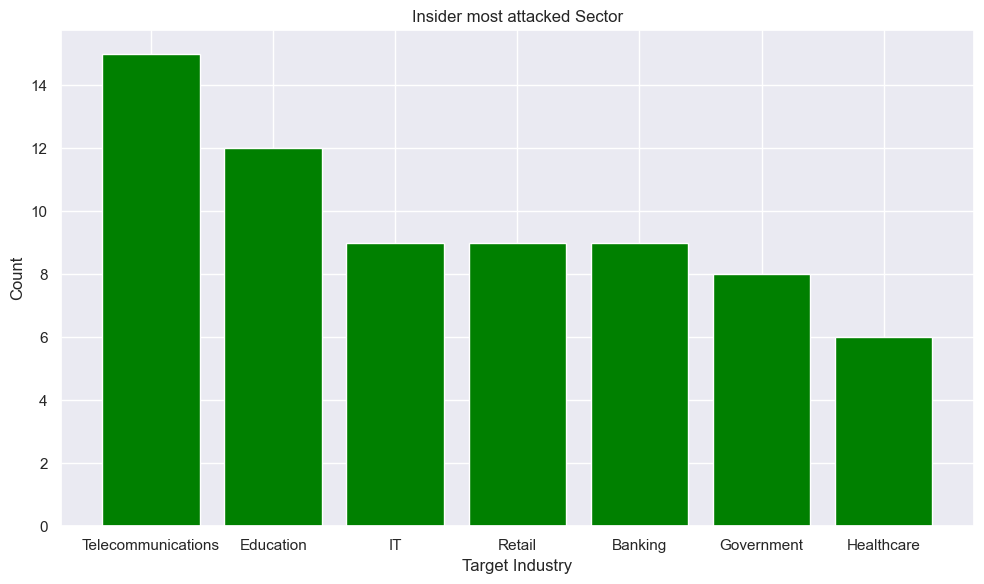

In [257]:
mst_affected_sector = df[(df['Country']=='UK') & (df['Attack Source']=='Insider')]['Target Industry'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(mst_affected_sector.index, mst_affected_sector.values, color='green')
plt.xlabel('Target Industry')
plt.ylabel('Count')
plt.title('Insider most attacked Sector')
plt.tight_layout()
plt.plot()

**Most attacked Sector by insiders is telecommunications**

[]

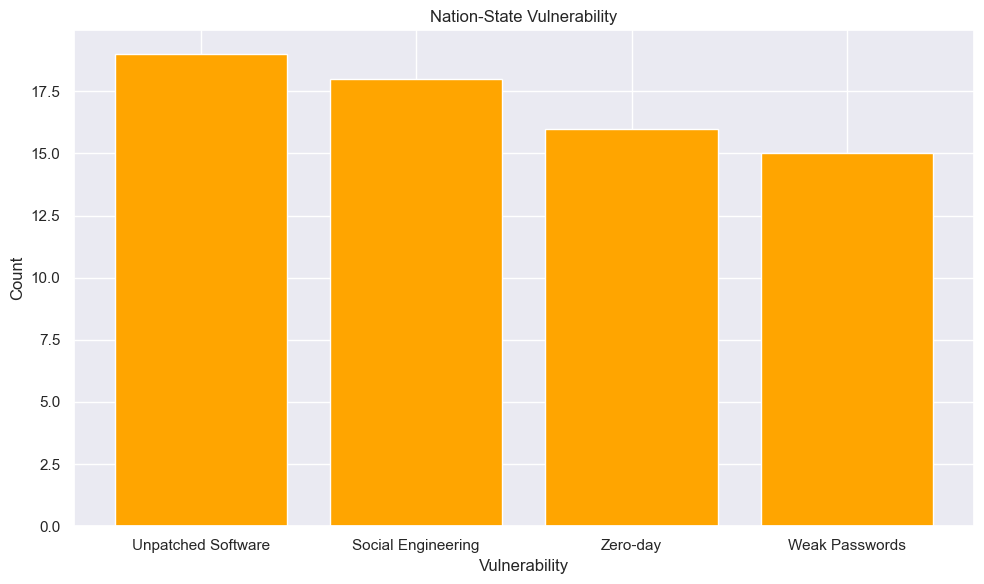

In [270]:
vul_type_uk = df[(df['Country']=='UK') & (df['Attack Source']=='Insider')]['Security Vulnerability Type'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(vul_type_uk.index, vul_type_uk.values, color='orange')
plt.xlabel('Vulnerability')
plt.ylabel('Count')
plt.title('Nation-State Vulnerability')
plt.tight_layout()
plt.plot()

[]

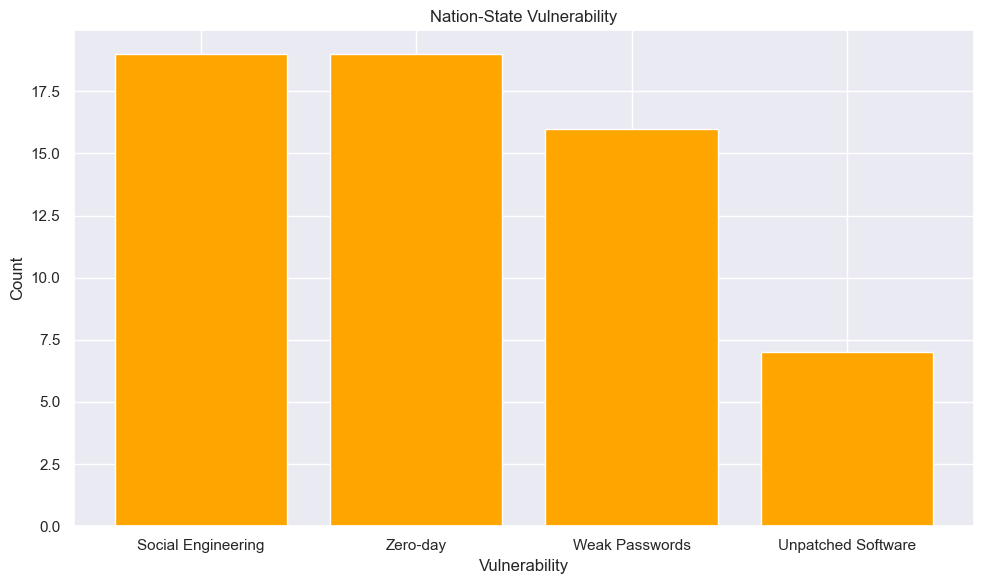

In [271]:
vul_type_uk_d = df[(df['Country']=='Brazil') & (df['Attack Type']=='Phishing')]['Security Vulnerability Type'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(vul_type_d.index, vul_type_d.values, color='orange')
plt.xlabel('Vulnerability')
plt.ylabel('Count')
plt.title('Nation-State Vulnerability')
plt.tight_layout()
plt.plot()

## 📊 Final Insights: Cybersecurity Attacks in the UK

> 📝 **Note:** All insights below are based on **phishing attacks** and **insider-based attacks**.

---

### 🔐 Most Prominent Attack Type  
→ **Phishing**

---

### 🛡️ Most Used Defense Mechanism Against Phishing  
→ **AI-based Detection**  
⏱️ Took **over 30 hours on average** to resolve incidents

---

### 🎯 Most Common Attack Source  
→ **Unknown** (indicates unidentified threat actors)  
→ 2ⁿᵈ most common: **Hacker Groups**  
🛠️ **Key vulnerability**: *Unpatched Software*

---

### ⏱️ Longest Time Taken to Resolve (by Attack Source)  
→ **Insider Attacks**  
🕓 Took **more than 50 hours** on average  
📡 Most targeted sector by insiders: **Telecommunications**  
🛠️ **Key vulnerabilities**: *Zero-Day Exploits*, *Social Engineering*

---

### 🕵️ Most Common Insider Attack Type  
→ **Man-in-the-Middle (MITM)**

---

### 🏦 Most Affected Sector (Phishing)  
→ **Banking**


### Brazil

In [226]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [227]:
#we will do the same analysis with brazil as well it has the most count (average) for affected users
attacks_brazil = df[df['Country']=='Brazil']['Attack Type'].value_counts()

[]

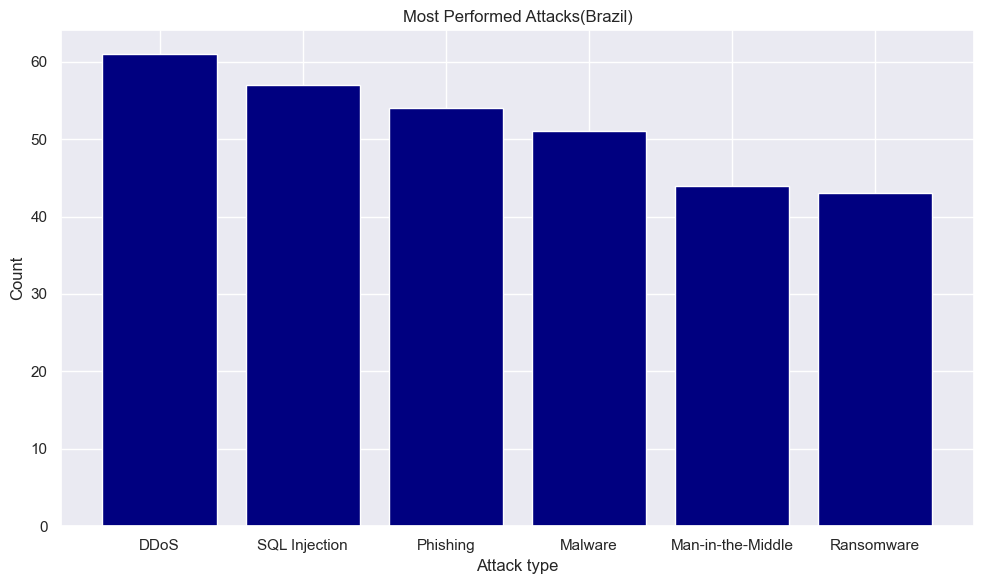

In [228]:
plt.figure(figsize=(10,6))
plt.bar(attacks_brazil.index, attacks_brazil.values, color='navy')
plt.xlabel('Attack type')
plt.ylabel('Count')
plt.title('Most Performed Attacks(Brazil)')
plt.tight_layout()
plt.plot()

In [229]:
#most prominent defence mechanism against DDoS used in brazil
most_used_def = df[(df['Country']=='Brazil') & (df['Attack Type']=='DDoS')]['Defense Mechanism Used'].value_counts()

[]

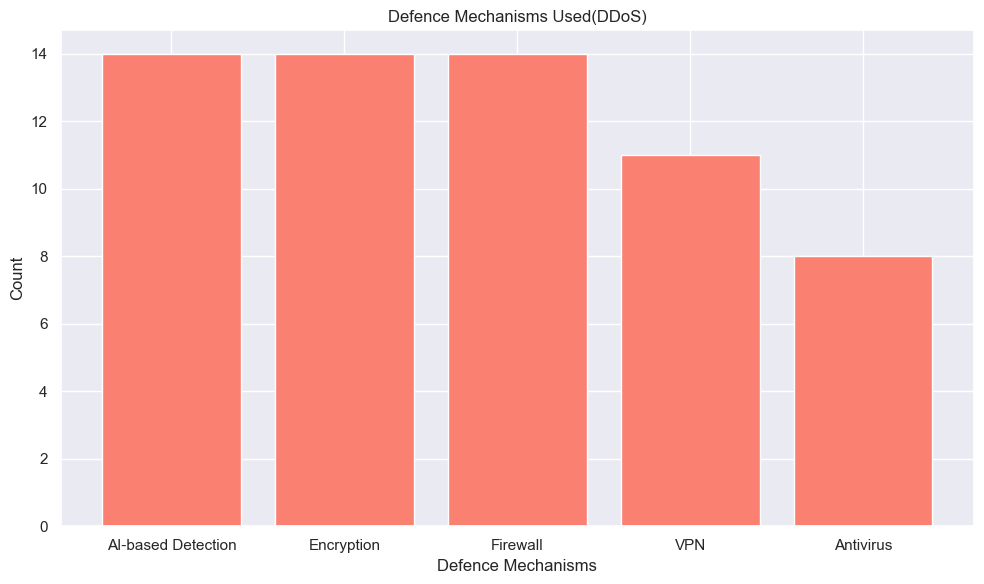

In [230]:
plt.figure(figsize=(10,6))
plt.bar(most_used_def.index, most_used_def.values, color='salmon')
plt.xlabel('Defence Mechanisms')
plt.ylabel('Count')
plt.title('Defence Mechanisms Used(DDoS)')
plt.tight_layout()
plt.plot()

**Now we can see 3 types of defence mechanisms were used equal times to fend off DDoS attacks.
Let's further visualize using mitigation time**

In [231]:
#let's find out which attack system performed quite good againts DDoS
mech = round(df[(df['Country']=='Brazil') & (df['Attack Type']=='DDoS')].groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().sort_values())

[]

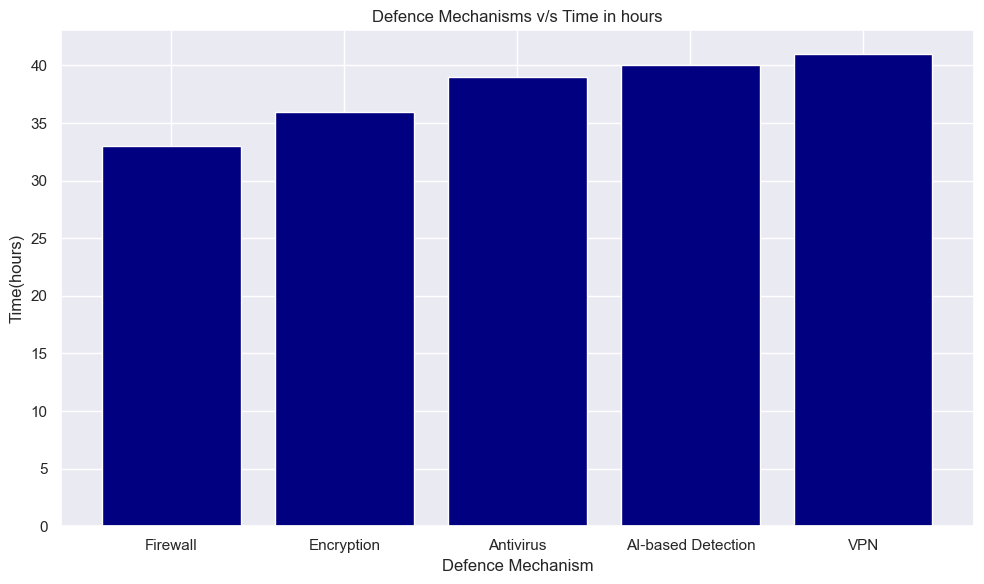

In [232]:
plt.figure(figsize=(10,6))
plt.bar(mech.index, mech.values, color='navy')
plt.xlabel('Defence Mechanism')
plt.ylabel('Time(hours)')
plt.title('Defence Mechanisms v/s Time in hours')
plt.tight_layout()
plt.plot()

**We can see Firewall took less time to fend off against let's visualize further using firewall as defence mechanism and attack type as DDoS**

[]

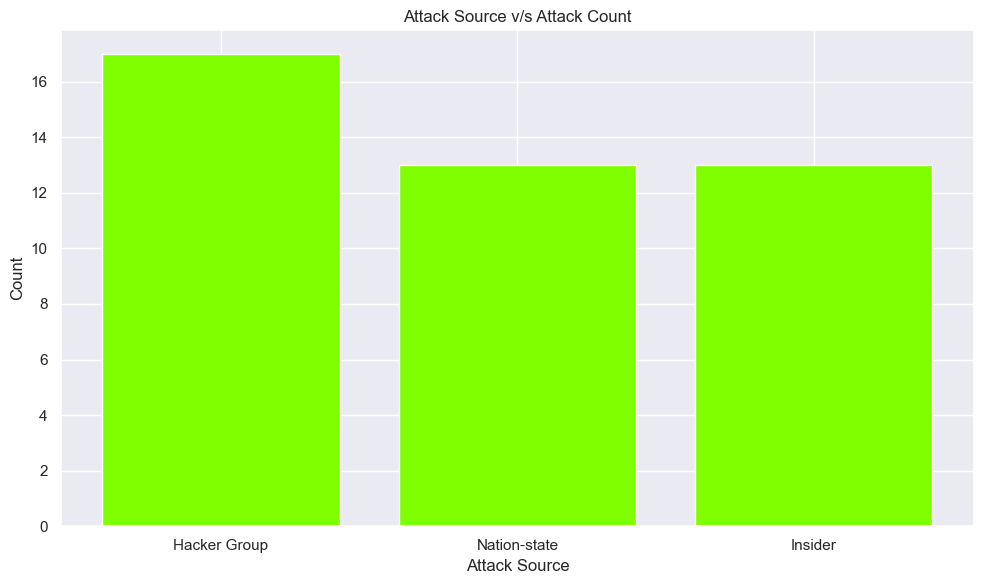

In [233]:
most_attack_source = df[(df['Country']=='Brazil') & (df['Attack Type']=='DDoS')]['Attack Source'].value_counts().drop('Unknown')
plt.figure(figsize=(10,6))
plt.bar(most_attack_source.index, most_attack_source.values, color='chartreuse')
plt.xlabel('Attack Source')
plt.ylabel('Count')
plt.title('Attack Source v/s Attack Count')
plt.tight_layout()
plt.plot()

**Most attack source is Hacker Group**

In [234]:
#Most time took to resolve which attack source
time_to_res = round(df[(df['Country']=='Brazil') & (df['Attack Type']=='DDoS')].groupby('Attack Source')['Incident Resolution Time (in Hours)'].mean().drop('Unknown'))

[]

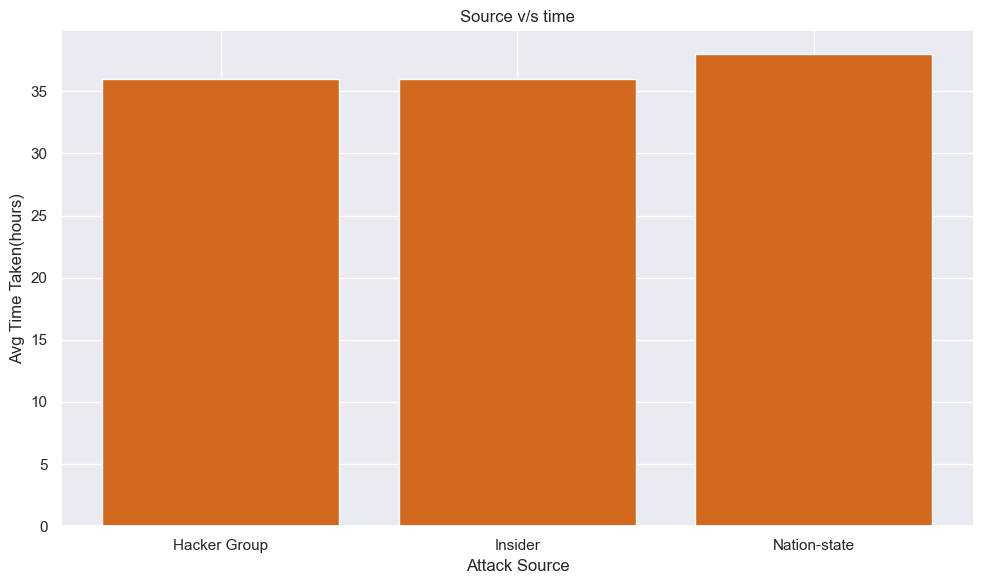

In [235]:
plt.figure(figsize=(10,6))
plt.bar(time_to_res.index, time_to_res.values, color = 'chocolate')
plt.xlabel('Attack Source')
plt.ylabel('Avg Time Taken(hours)')
plt.title("Source v/s time")
plt.tight_layout()
plt.plot()

**We can see Nation-State alerts took most time to resolve**

[]

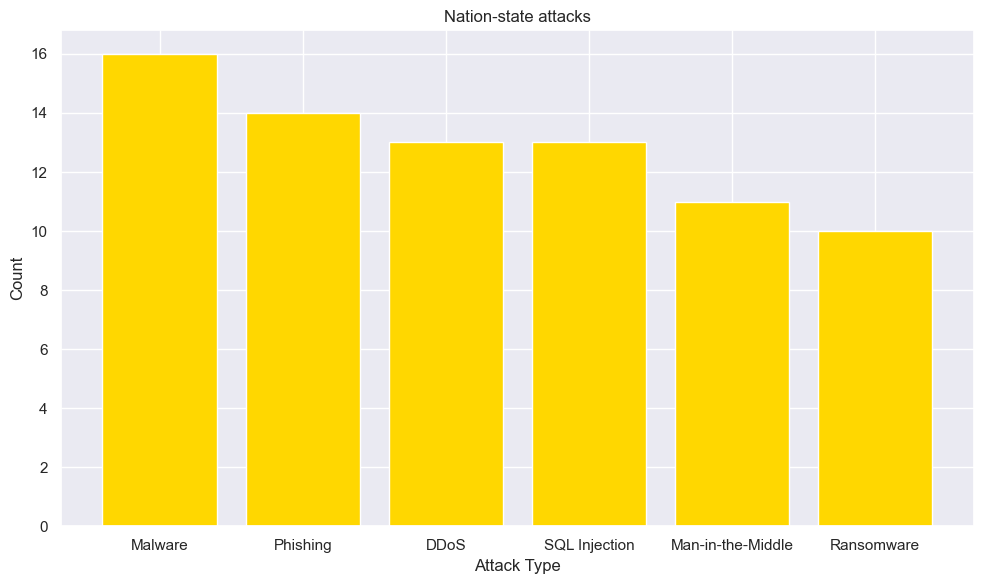

In [244]:
# let's find out what attacks nation-state used
attks_src = df[(df['Country']=='Brazil') & (df['Attack Source']=='Nation-state')]['Attack Type'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(attks_src.index, attks_src.values, color='gold')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Nation-state attacks')
plt.tight_layout()
plt.plot()

**Most used attack by nation states are malwares**

In [245]:
#most affected Sector attack type
mst_aff_sector = df[(df['Country']=='Brazil') & (df['Attack Type']=='DDoS')]['Target Industry'].value_counts()

[]

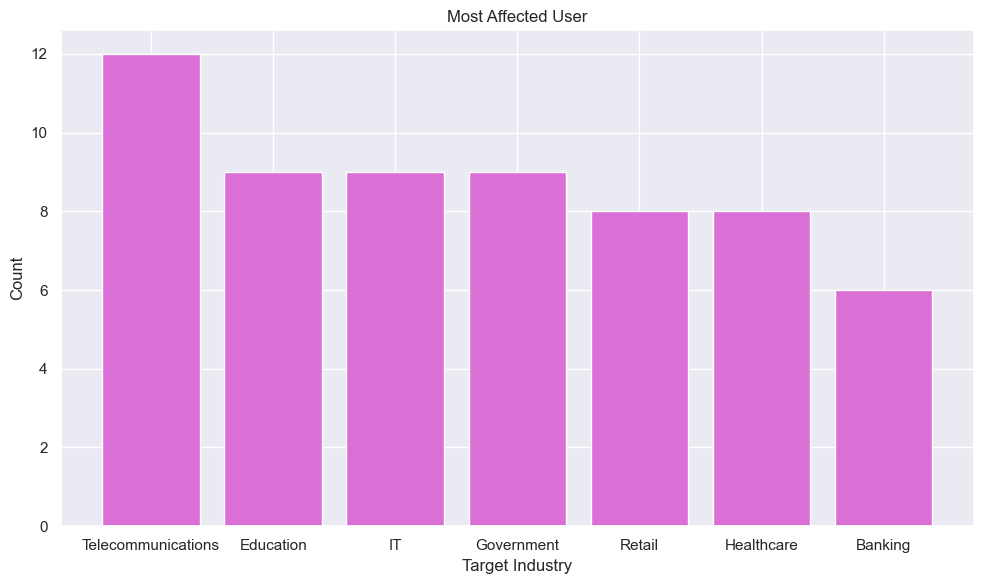

In [248]:
plt.figure(figsize=(10,6))
plt.bar(mst_aff_sector.index, mst_aff_sector.values, color='orchid')
plt.xlabel('Target Industry')
plt.ylabel('Count')
plt.title('Most Affected User')
plt.tight_layout()
plt.plot()

**Telecommunications is the most targeted sector for DDoS**

[]

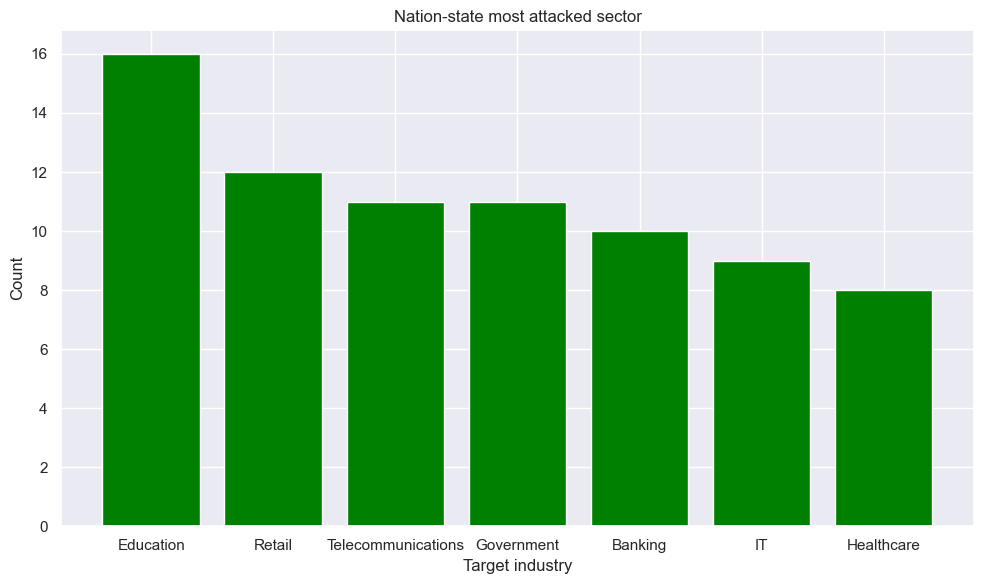

In [250]:
#most affected sector by attack source
mst_aff_sector_attk_src = df[(df['Country']=='Brazil') & (df['Attack Source']=='Nation-state')]['Target Industry'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(mst_aff_sector_attk_src.index, mst_aff_sector_attk_src.values, color='green')
plt.xlabel('Target industry')
plt.ylabel('Count')
plt.title('Nation-state most attacked sector')
plt.tight_layout()
plt.plot()

**Education is the most attacked sector by nation-state alerts**

[]

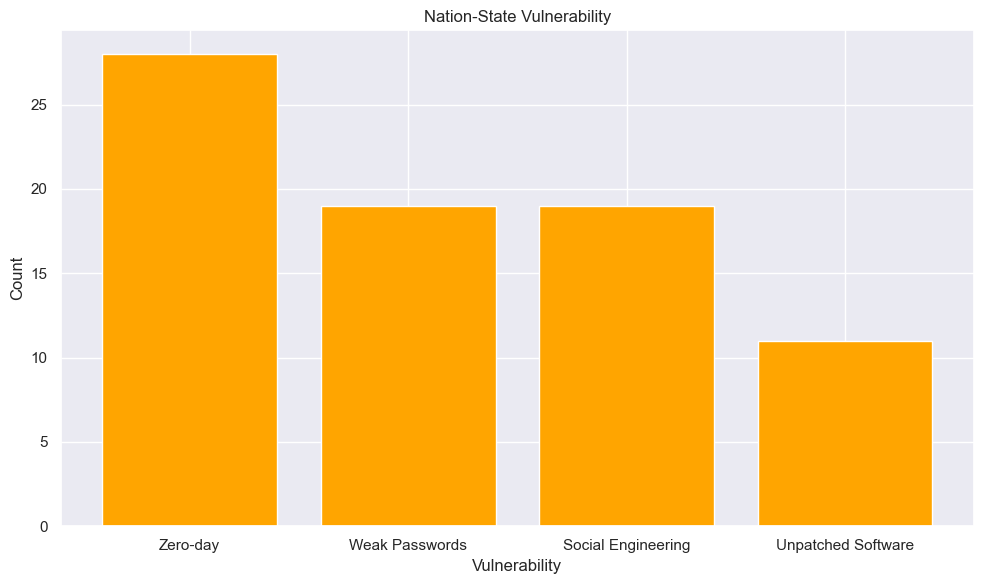

In [263]:
vul_type = df[(df['Country']=='Brazil') & (df['Attack Source']=='Nation-state')]['Security Vulnerability Type'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(vul_type.index, vul_type.values, color='orange')
plt.xlabel('Vulnerability')
plt.ylabel('Count')
plt.title('Nation-State Vulnerability')
plt.tight_layout()
plt.plot()

[]

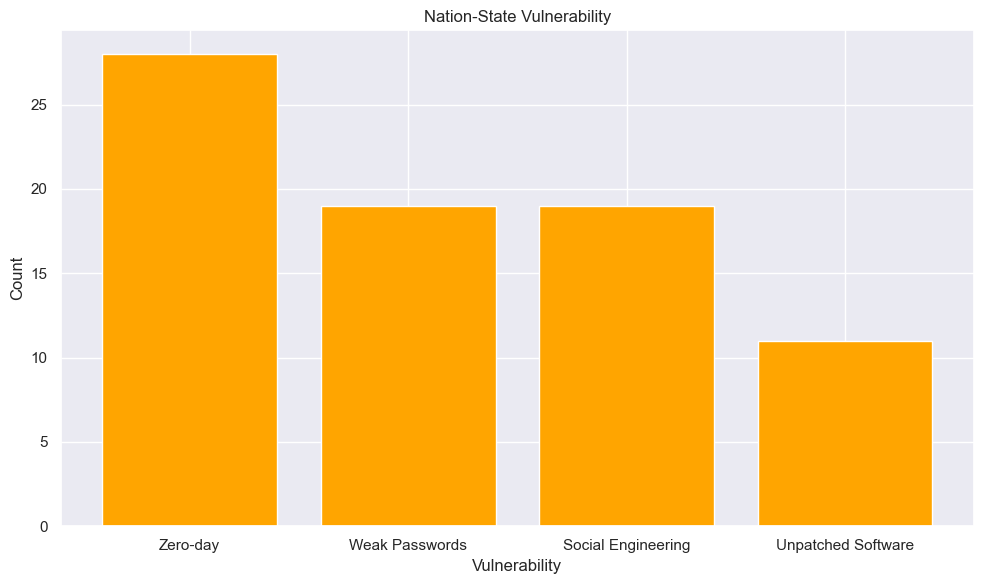

In [264]:
vul_type_d = df[(df['Country']=='Brazil') & (df['Attack Type']=='DDoS')]['Security Vulnerability Type'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(vul_type.index, vul_type.values, color='orange')
plt.xlabel('Vulnerability')
plt.ylabel('Count')
plt.title('Nation-State Vulnerability')
plt.tight_layout()
plt.plot()

## 🌐 Brazil Cybersecurity Data – Key Insights

### 📌 Focus Factors:
1. Based on **DDoS attacks**  
2. Based on **Nation-State attackers**

---

### 🔍 Key Observations:

- **Most Performed Attack:**  
  → **DDoS**

- **Defense Mechanisms Used Against DDoS:**  
  → **Encryption** – *Avg. Resolution Time: 35 hours*  
  → **Firewall** – *Avg. Resolution Time: 30 hours*  
  → **AI-Based Detection** – *Avg. Resolution Time: 40 hours*  
  ✅ **Firewall performed the best among the three**

- **Most Common Attack Source:**  
  → **Unknown**  
  → 2ⁿᵈ most common: **Nation-State**  
  ⏱️ **Nation-State attacks** took **over 35 hours** on average to resolve

- **Most Used Attack Type by Nation-State:**  
  → **Malware**

- **DDoS Targeted Sector:**  
  → **Telecommunications**

- **Nation-State Targeted Sector:**  
  → **Education**

- **Exploited Vulnerability:**  
  → **Zero-day** 

---


# General visualization based on entire dataset to find out which mechanism is best for what attacks to fend them off

In [258]:
df.head(3)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20


- best practice against:- 
1. Phishing
2. DDoS
3. MITM
4. Malware

- compare UK and Brazil's practice with rest of the world

In [279]:
#first let's find out what are the best practices against 
filtered_df = df[df['Attack Type'].isin(['Phishing', 'DDoS', 'Malware', 'Man-in-the-Middle'])]
new_df = filtered_df.groupby('Attack Type')
new_df.head(1)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
6,Germany,2016,DDoS,Telecommunications,33.26,431262,Insider,Unpatched Software,VPN,34
18,UK,2019,Malware,Telecommunications,14.01,578443,Insider,Social Engineering,Firewall,28


In [324]:
#best country practices for phishing its russia
avg_cou = df[df['Attack Type']=='Phishing'].groupby('Country')['Incident Resolution Time (in Hours)'].sum().sort_values()

#best country practices for DDoS its germany
avg_cou_ddos = df[df['Attack Type']=='DDoS'].groupby('Country')['Incident Resolution Time (in Hours)'].sum().sort_values()

#best country practices for MITM its usa
avg_cou_mitm = df[df['Attack Type']=='Man-in-the-Middle'].groupby('Country')['Incident Resolution Time (in Hours)'].sum().sort_values()

#best country practices for malware its china
avg_cou_mal = df[df['Attack Type']=='Malware'].groupby('Country')['Incident Resolution Time (in Hours)'].sum().sort_values()

[]

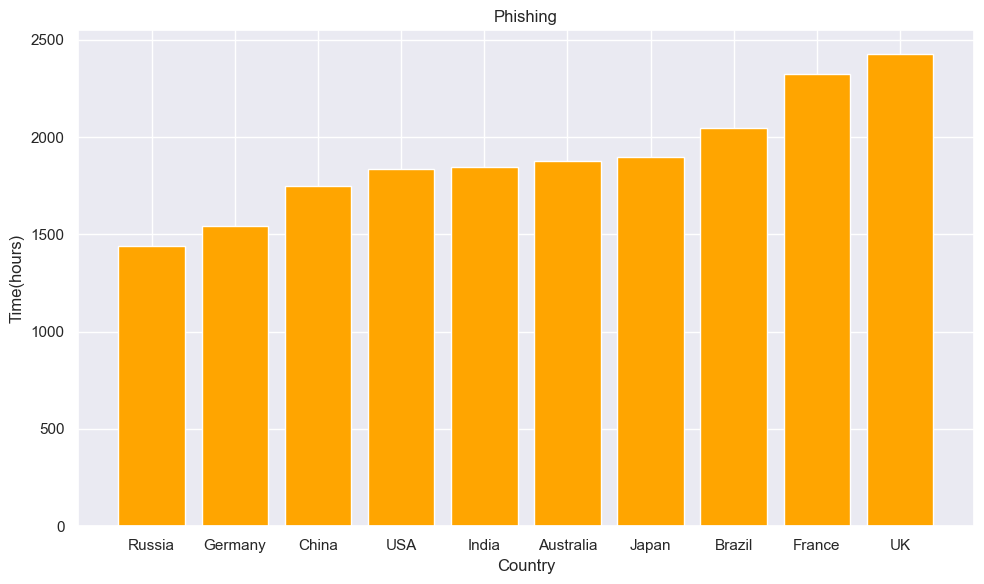

In [330]:
plt.figure(figsize=(10,6))
plt.bar(avg_cou.index, avg_cou.values, color='orange')
plt.xlabel('Country')
plt.ylabel('Time(hours)')
plt.title('Phishing')
plt.tight_layout()
plt.plot()

**Phishing - Russia**

[]

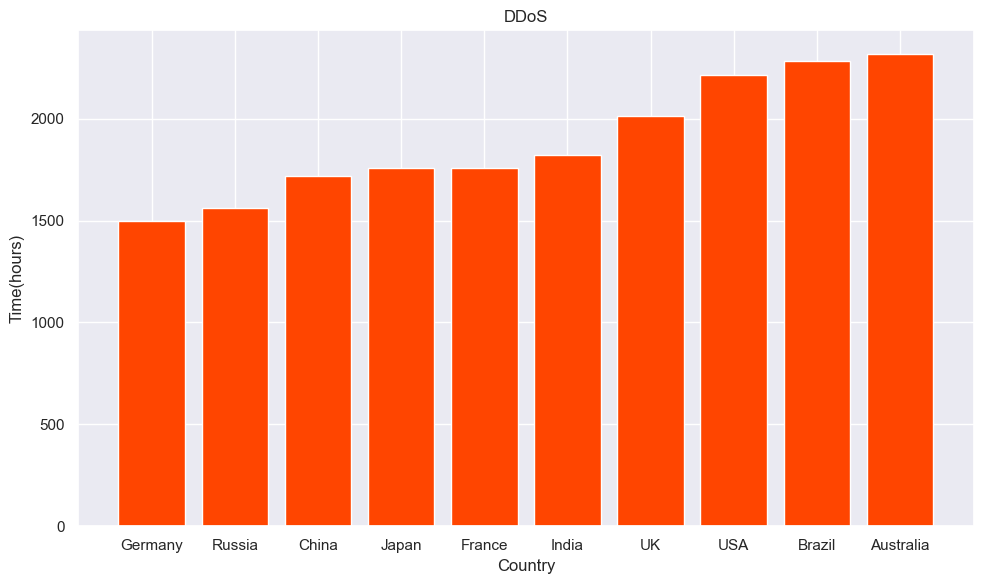

In [331]:
plt.figure(figsize=(10,6))
plt.bar(avg_cou_ddos.index, avg_cou_ddos.values, color='orangered')
plt.xlabel('Country')
plt.ylabel('Time(hours)')
plt.title('DDoS')
plt.tight_layout()
plt.plot()

**DDoS - Germany**

[]

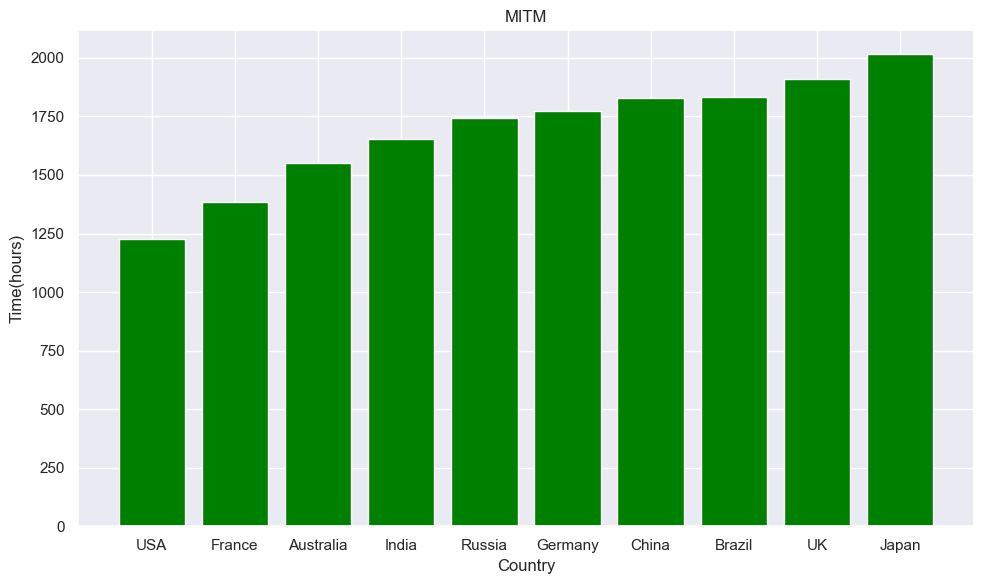

In [329]:
plt.figure(figsize=(10,6))
plt.bar(avg_cou_mitm.index, avg_cou_mitm.values, color='green')
plt.xlabel('Country')
plt.ylabel('Time(hours)')
plt.title('MITM')
plt.tight_layout()
plt.plot()

**MITM - USA**

[]

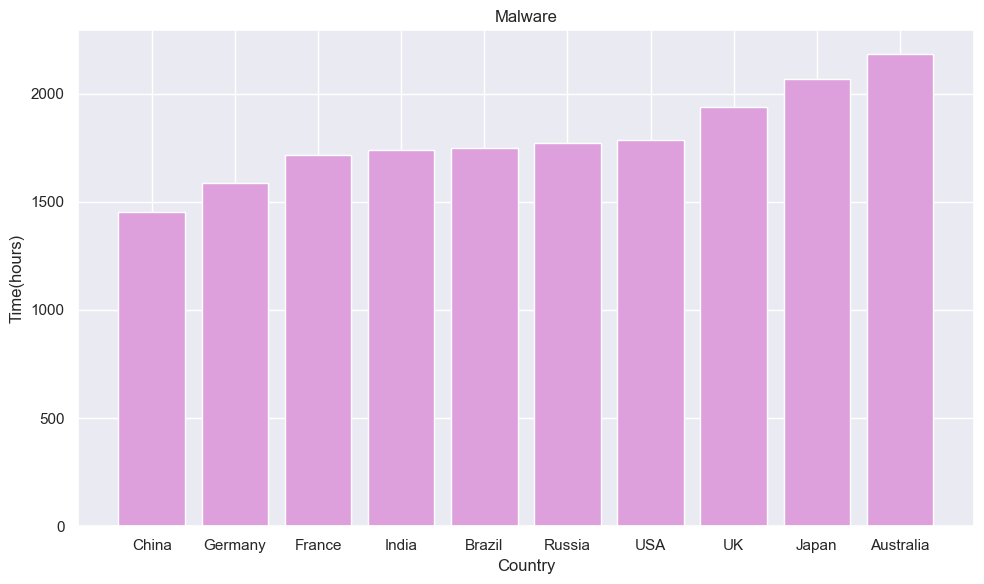

In [328]:
plt.figure(figsize=(10,6))
plt.bar(avg_cou_mal.index, avg_cou_mal.values, color='plum')
plt.xlabel('Country')
plt.ylabel('Time(hours)')
plt.title('Malware')
plt.tight_layout()
plt.plot()

**Malware - China**

---
Best Countries :-
1. DDoS - Germany
2. MITM - USA
3. Malware - China
4. Phishing - Russia

[]

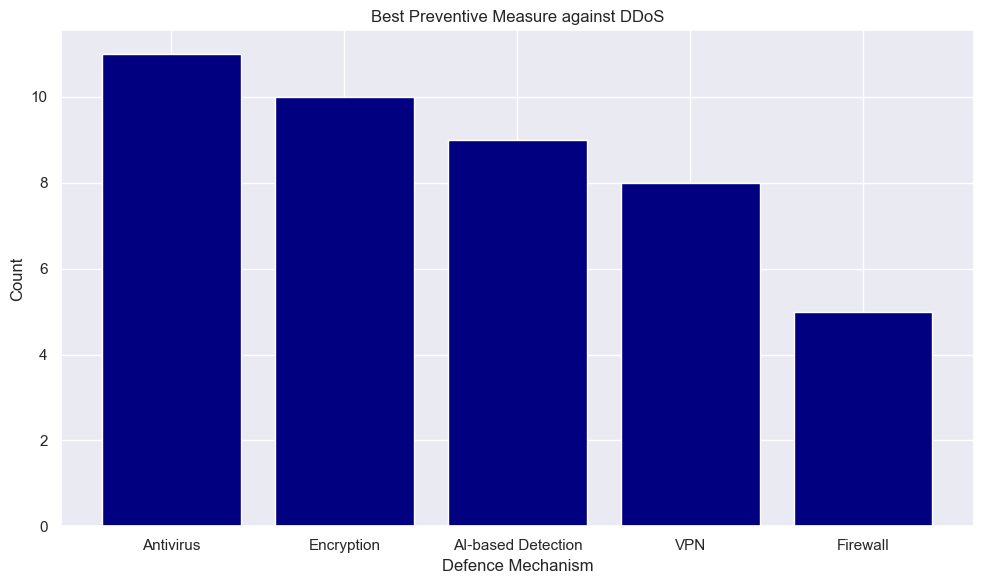

In [337]:
#let's find out the best defence mechanics these countries used to fend off these attacks
#1.DDoS
mecha_germany = df[(df['Attack Type']=='DDoS') & (df['Country']=='Germany')]['Defense Mechanism Used'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(mecha_germany.index, mecha_germany.values, color='navy')
plt.xlabel('Defence Mechanism')
plt.ylabel('Count')
plt.title('Best Preventive Measure against DDoS')
plt.tight_layout()
plt.plot()

**DDoS-Antivirus**

[]

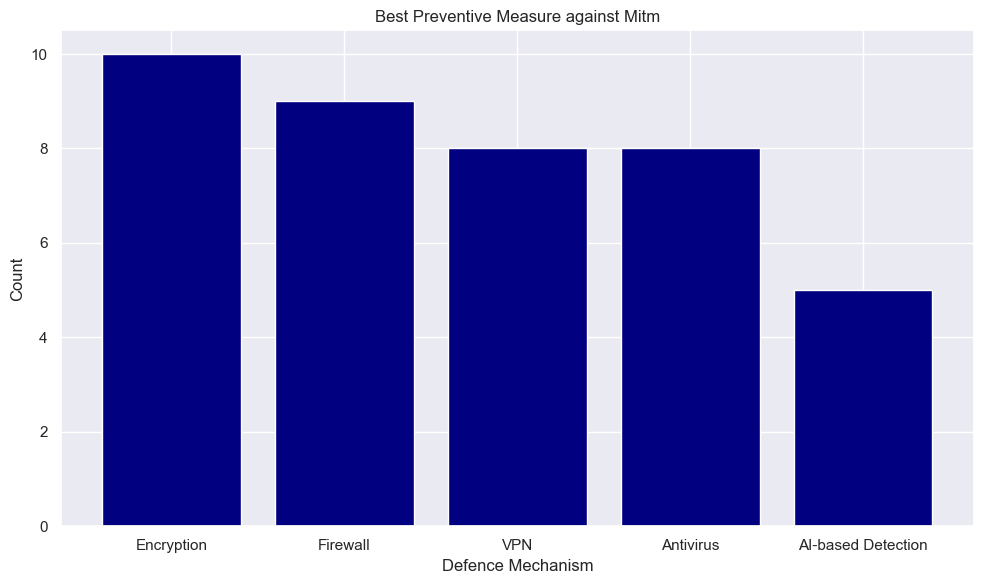

In [338]:
#2.MITM
mecha_usa = df[(df['Attack Type']=='Man-in-the-Middle') & (df['Country']=='USA')]['Defense Mechanism Used'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(mecha_usa.index, mecha_usa.values, color='navy')
plt.xlabel('Defence Mechanism')
plt.ylabel('Count')
plt.title('Best Preventive Measure against Mitm')
plt.tight_layout()
plt.plot()

**MITM - Encryption** 

[]

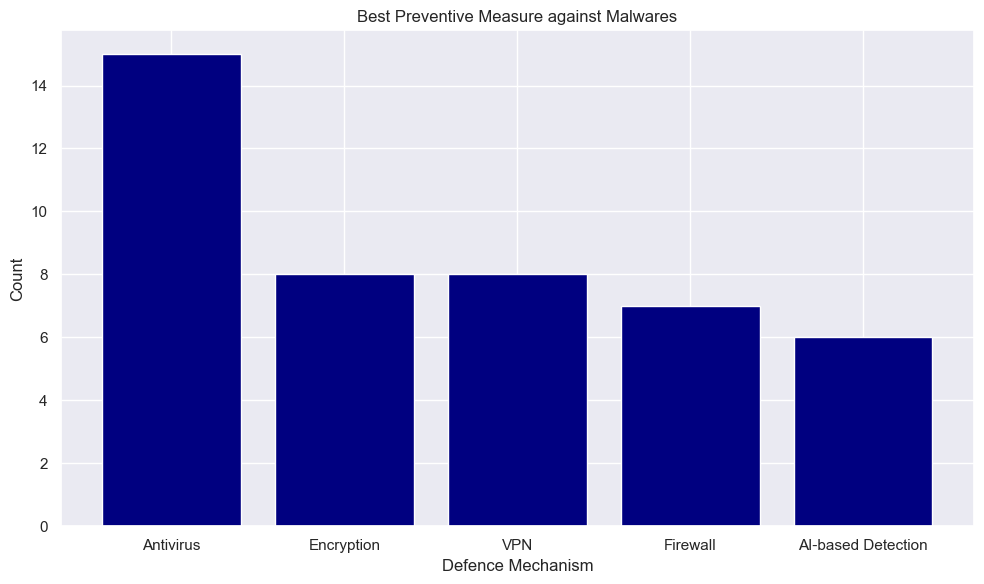

In [339]:
#3. Malware
mecha_china = df[(df['Attack Type']=='Malware') & (df['Country']=='China')]['Defense Mechanism Used'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(mecha_china.index, mecha_china.values, color='navy')
plt.xlabel('Defence Mechanism')
plt.ylabel('Count')
plt.title('Best Preventive Measure against Malwares')
plt.tight_layout()
plt.plot()

**Malwares - Antivirus**

[]

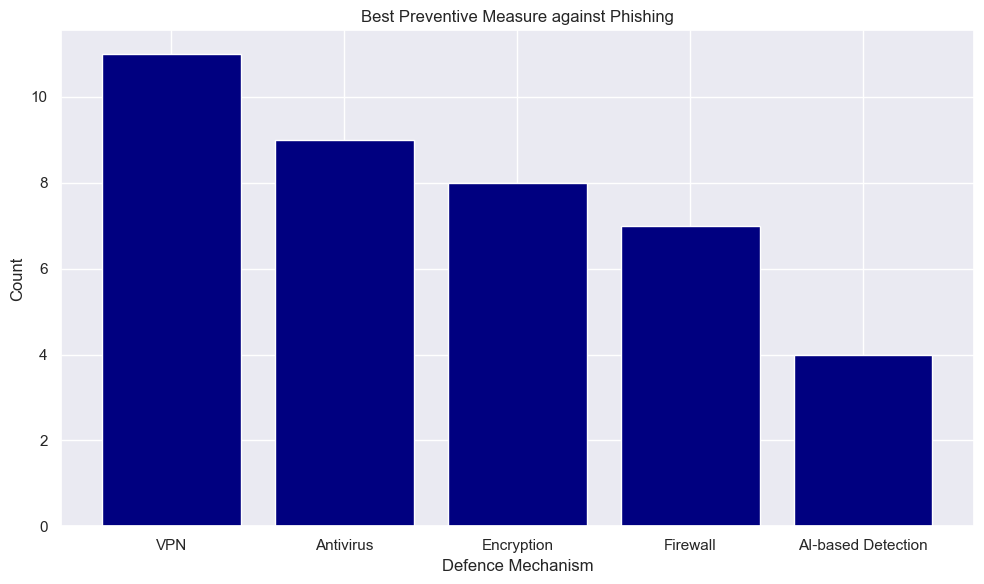

In [341]:
#4. phishing
mecha_russia = df[(df['Attack Type']=='Phishing') & (df['Country']=='Russia')]['Defense Mechanism Used'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(mecha_russia.index, mecha_russia.values, color='navy')
plt.xlabel('Defence Mechanism')
plt.ylabel('Count')
plt.title('Best Preventive Measure against Phishing')
plt.tight_layout()
plt.plot()

**Phishing - VPN** 

In [354]:
#difference between uk and brazil practices with rest of the best practioners
#uk - phishing, mitm
#brazil - ddos, malware
#if these countries use this method how much time they can save and its an average and somewhat approximate not entirely exact
phish_uk = df[(df['Country']=='UK') & (df['Attack Type']=='Phishing')]['Incident Resolution Time (in Hours)'].sum()
phish_rus = df[(df['Country']=='Russia') & (df['Attack Type']=='Phishing')]['Incident Resolution Time (in Hours)'].sum()
phish_percent = round(((phish_uk-phish_rus)/phish_uk)*100)
print(f'If UK uses VPN against Phishing like Russia do they can save time and resources upto {phish_percent} %')

If UK uses VPN against Phishing like Russia do they can save time and resources upto 41 %


**If UK uses VPN against Phishing like Russia do they can save time and resources upto 41 %**

In [357]:
mitm_uk = df[(df['Country']=='UK') & (df['Attack Type']=='Man-in-the-Middle')]['Incident Resolution Time (in Hours)'].sum()
mitm_usa = df[(df['Country']=='USA') & (df['Attack Type']=='Man-in-the-Middle')]['Incident Resolution Time (in Hours)'].sum()
mitm_percent = round(((mitm_uk-mitm_usa)/mitm_uk)*100)
print(f'If UK uses Encryption against MITM attacks like USA do they can save time and resources upto {mitm_percent} %')

If UK uses Encryption against MITM attacks like USA do they can save time and resources upto 36 %


**If UK uses Encryption against MITM attacks like USA do they can save time and resources upto 36 %**

In [359]:
ddos_brazil = df[(df['Country']=='Brazil') & (df['Attack Type']=='DDoS')]['Incident Resolution Time (in Hours)'].sum()
ddos_germany = df[(df['Country']=='Germany') & (df['Attack Type']=='DDoS')]['Incident Resolution Time (in Hours)'].sum()
ddos_percent = round(((ddos_brazil-ddos_germany)/ddos_brazil)*100)
print(f'If Brazil uses Antivirus method against DDoS like Germany do they can save time and resources upto {ddos_percent} %')

If Brazil uses Antivirus method against DDoS like Germany do they can save time and resources upto 34 %


**If Brazil uses Antivirus method against DDoS like Germany do they can save time and resources upto 34 %**

In [360]:
malware_brazil = df[(df['Country']=='Brazil') & (df['Attack Type']=='Malware')]['Incident Resolution Time (in Hours)'].sum()
malware_china = df[(df['Country']=='China') & (df['Attack Type']=='Malware')]['Incident Resolution Time (in Hours)'].sum()
malware_percent = round(((malware_brazil-malware_china)/malware_brazil)*100)
print(f'If Brazil uses Antivirus method against Malwares like China do they can save time and resources upto {malware_percent} %')

If Brazil uses Antivirus method against Malwares like China do they can save time and resources upto 17 %


**If Brazil uses Antivirus method against Malwares like China do they can save time and resources upto 17 %**

In [367]:
total_time_by_attack = df.groupby('Attack Type')['Incident Resolution Time (in Hours)'].mean()
most_dangerous_attack = total_time_by_attack.idxmax()
most_dangerous_time = total_time_by_attack.max()

print(f"Most dangerous attack type: {most_dangerous_attack} with average of {round(most_dangerous_time)} hours in total resolution time.")

Most dangerous attack type: Malware with average of 37 hours in total resolution time.


**Most dangerous attack type: Malware with average of 37 hours in total resolution time.**

In [370]:
total_time_by_vul = df.groupby('Security Vulnerability Type')['Incident Resolution Time (in Hours)'].mean()
most_dangerous_vul_type = total_time_by_vul.idxmax()
most_dangerous_vul_time = total_time_by_vul.max()

print(f"Most dangerous vulnerability type: {most_dangerous_vul_type} with average of {round(most_dangerous_vul_time)} hours in total resolution time.")

Most dangerous vulnerability type: Unpatched Software with average of 38 hours in total resolution time.


**Most dangerous vulnerability type: Unpatched Software with average of 38 hours in total resolution time.**

## 🧾 Final Report: Cybersecurity Analysis

---

### 🌍 Why UK and Brazil?

- 🇬🇧 **UK**: Chosen due to the **highest financial losses** recorded from cyberattacks  
- 🇧🇷 **Brazil**: Selected because it had the **most affected users**

---

## 🇬🇧 UK Cybersecurity Analysis

> 📝 **Note:** All insights below are based on **phishing attacks** and **insider-based attacks**.

---

### 🔐 Most Prominent Attack Type  
→ **Phishing**

---

### 🛡️ Most Used Defense Mechanism Against Phishing  
→ **AI-based Detection**  
⏱️ Took **over 30 hours on average** to resolve incidents

---

### 🎯 Most Common Attack Source  
→ **Unknown** (indicates unidentified threat actors)  
→ 2ⁿᵈ most common: **Hacker Groups**  
🛠️ **Key vulnerability**: *Unpatched Software*

---

### ⏱️ Longest Time Taken to Resolve (by Attack Source)  
→ **Insider Attacks**  
🕓 Took **more than 50 hours** on average  
📡 Most targeted sector by insiders: **Telecommunications**  
🛠️ **Key vulnerabilities**: *Zero-Day Exploits*, *Social Engineering*

---

### 🕵️ Most Common Insider Attack Type  
→ **Man-in-the-Middle (MITM)**

---

### 🏦 Most Affected Sector (Phishing)  
→ **Banking**

---

## 🇧🇷 Brazil Cybersecurity Data – Key Insights

### 📌 Focus Factors:
1. Based on **DDoS attacks**  
2. Based on **Nation-State attackers**

---

### 🔍 Key Observations:

- **Most Performed Attack:**  
  → **DDoS**

- **Defense Mechanisms Used Against DDoS:**  
  → **Encryption** – *Avg. Resolution Time: 35 hours*  
  → **Firewall** – *Avg. Resolution Time: 30 hours*  
  → **AI-Based Detection** – *Avg. Resolution Time: 40 hours*  
  ✅ **Firewall performed the best among the three**

- **Most Common Attack Source:**  
  → **Unknown**  
  → 2ⁿᵈ most common: **Nation-State**  
  ⏱️ **Nation-State attacks** took **over 35 hours** on average to resolve

- **Most Used Attack Type by Nation-State:**  
  → **Malware**

- **DDoS Targeted Sector:**  
  → **Telecommunications**

- **Nation-State Targeted Sector:**  
  → **Education**

- **Exploited Vulnerability:**  
  → **Zero-day** 

---

## 🌐 Global Data Comparison & Recommendations

### 🏅 Best Performing Countries (per attack type)

| Attack Type | Best Country |
|-------------|--------------|
| DDoS        | Germany      |
| MITM        | USA          |
| Malware     | China        |
| Phishing    | Russia       |

---

### ✅ Suggested Best Practices

| Attack Type | Best Practice |
|-------------|---------------|
| DDoS        | Antivirus      |
| Malware     | Antivirus      |
| Phishing    | VPN            |
| MITM        | Encryption     |

---

### 📊 Impactful Strategy Suggestions

- 🇬🇧 **UK** adopting **VPN** against phishing like **Russia** can reduce time/resource usage by **41%**
- 🇬🇧 **UK** using **Encryption** for MITM like **USA** can reduce impact by **36%**
- 🇧🇷 **Brazil** implementing **Antivirus** for DDoS like **Germany** may cut losses by **34%**
- 🇧🇷 **Brazil** using **Antivirus** for malware like **China** can reduce impact by **17%**

---

## 🔥 Critical Global Insights

- ⚠️ **Most Dangerous Attack Type**:  
  → **Malware** – *Average resolution time: 37 hours*

- 🛠️ **Most Dangerous Vulnerability**:  
  → **Unpatched Software** – *Average resolution time: 38 hours*
